# Targets whose value difference of the label between max and min is larger than threshold

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.965,0.857,0.899,0.894,0.936,0.892,0.084,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.966,0.859,0.900,0.895,0.937,0.893,0.054,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.980,0.965,0.852,0.901,0.896,0.928,0.887,26.445,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.964,0.856,0.899,0.895,0.928,0.887,26.413,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.980,0.961,0.852,0.900,0.895,0.933,0.890,0.391,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107795,model_5_seed_1_rec_7_ens_8,0.996,0.994,0.948,0.933,0.930,0.874,NaN,1.251,model_5,...,343,7MT1_A,1.300,2021-06-09T00:00:00Z,>7mt1_A mol:protein length:343 Platelet-activ...,MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...,343,1,1,False
107796,model_5_seed_1_rec_8_ens_1,0.996,0.993,0.949,0.935,0.931,0.880,NaN,0.277,model_5,...,343,7MT1_A,1.300,2021-06-09T00:00:00Z,>7mt1_A mol:protein length:343 Platelet-activ...,MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...,343,1,1,False
107797,model_5_seed_1_rec_8_ens_8,0.996,0.994,0.948,0.933,0.929,0.872,NaN,0.574,model_5,...,343,7MT1_A,1.300,2021-06-09T00:00:00Z,>7mt1_A mol:protein length:343 Platelet-activ...,MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...,343,1,1,False
107798,model_5_seed_1_rec_9_ens_1,0.996,0.993,0.948,0.937,0.933,0.887,NaN,0.334,model_5,...,343,7MT1_A,1.300,2021-06-09T00:00:00Z,>7mt1_A mol:protein length:343 Platelet-activ...,MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...,343,1,1,False


In [4]:
# Check target number changing threshold
label = 'GDT_TS'
thresholds = [0.05, 0.10, 0.15, 0.20]
for threshold in thresholds:
    data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
    print(threshold, data['Target'].unique().size)
    print(data['Target'].unique())

0.05 99
['5OJL_A' '6SIU_A' '6S36_A' '5OXS_A' '6OD8_A' '6ZVO_A' '5ZWL_E' '6JW0_A'
 '6U60_A' '6JDH_A' '6SJ5_A' '6FHV_A' '7OCX_C' '5YLW_A' '6D1V_A' '6E2J_B'
 '6E7R_B' '6U3W_B' '6J72_A' '6AA8_C' '6SXJ_A' '7MQ5_A' '6RRV_A' '7M7K_B'
 '5XX0_A' '6I2M_B' '6QO1_A' '6YIR_A' '6X1Z_A' '7D6R_A' '6GJK_A' '6HTF_A'
 '6PNY_A' '6LB7_A' '7BWV_A' '6EYG_A' '6N9A_B' '5Z35_A' '7COH_T' '6JFK_A'
 '6KJU_A' '6XHV_1P' '6ONC_D' '6SJV_A' '6RNQ_A' '6I3H_A' '6KV9_A' '7BU0_A'
 '6QP4_A' '6WWD_A' '6QPS_A' '6G1O_A' '6WWX_A' '6KK9_O' '6D2Y_A' '6PX4_T'
 '6I9O_A' '6QDI_A' '6FPZ_A' '6OV1_A' '7NZA_A' '6XR1_A' '6R5W_A' '6SCE_A'
 '6XVU_A' '6II6_A' '6GGK_A' '6R3R_A' '6E94_A' '5ZQ3_A' '7C7I_C' '7FE5_A'
 '7CHU_A' '5Y3T_A' '6LK7_A' '6TGV_A' '5XLL_A' '5Y6G_A' '6OK1_B' '6IIE_A'
 '5XWX_A' '6JHO_C' '7C2G_G' '6PFL_A' '7L1Y_A' '6RNK_A' '6LBU_B' '6JU8_A'
 '6L2W_A' '6DHX_A' '6VYD_A' '6YGQ_A' '6DGK_A' '6E7E_A' '7N50_A' '6H1W_A'
 '6IF6_A' '7CFU_J' '6W9S_A']
0.1 38
['5OXS_A' '6ZVO_A' '5ZWL_E' '6JW0_A' '6FHV_A' '7OCX_C' '6D1V_A' '6E2J_B'
 '6U3W

In [5]:
label = 'GDT_TS'
threshold = 0.05
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
print(threshold, fil_df['Target'].unique().size)
print(fil_df['Target'].unique())

0.05 99
['5OJL_A' '6SIU_A' '6S36_A' '5OXS_A' '6OD8_A' '6ZVO_A' '5ZWL_E' '6JW0_A'
 '6U60_A' '6JDH_A' '6SJ5_A' '6FHV_A' '7OCX_C' '5YLW_A' '6D1V_A' '6E2J_B'
 '6E7R_B' '6U3W_B' '6J72_A' '6AA8_C' '6SXJ_A' '7MQ5_A' '6RRV_A' '7M7K_B'
 '5XX0_A' '6I2M_B' '6QO1_A' '6YIR_A' '6X1Z_A' '7D6R_A' '6GJK_A' '6HTF_A'
 '6PNY_A' '6LB7_A' '7BWV_A' '6EYG_A' '6N9A_B' '5Z35_A' '7COH_T' '6JFK_A'
 '6KJU_A' '6XHV_1P' '6ONC_D' '6SJV_A' '6RNQ_A' '6I3H_A' '6KV9_A' '7BU0_A'
 '6QP4_A' '6WWD_A' '6QPS_A' '6G1O_A' '6WWX_A' '6KK9_O' '6D2Y_A' '6PX4_T'
 '6I9O_A' '6QDI_A' '6FPZ_A' '6OV1_A' '7NZA_A' '6XR1_A' '6R5W_A' '6SCE_A'
 '6XVU_A' '6II6_A' '6GGK_A' '6R3R_A' '6E94_A' '5ZQ3_A' '7C7I_C' '7FE5_A'
 '7CHU_A' '5Y3T_A' '6LK7_A' '6TGV_A' '5XLL_A' '5Y6G_A' '6OK1_B' '6IIE_A'
 '5XWX_A' '6JHO_C' '7C2G_G' '6PFL_A' '7L1Y_A' '6RNK_A' '6LBU_B' '6JU8_A'
 '6L2W_A' '6DHX_A' '6VYD_A' '6YGQ_A' '6DGK_A' '6E7E_A' '7N50_A' '6H1W_A'
 '6IF6_A' '7CFU_J' '6W9S_A']


In [6]:
diff_label = fil_df.groupby('Target').apply(lambda x: x[label].max() - x[label].min()).sort_values()
diff_label

Target
6KV9_A   0.050
6E7R_B   0.051
6QPS_A   0.051
6X1Z_A   0.052
6DHX_A   0.053
          ... 
6QDI_A   0.503
6E7E_A   0.567
6DGK_A   0.604
6L2W_A   0.616
6I3H_A   0.621
Length: 99, dtype: float64

<AxesSubplot:ylabel='Target'>

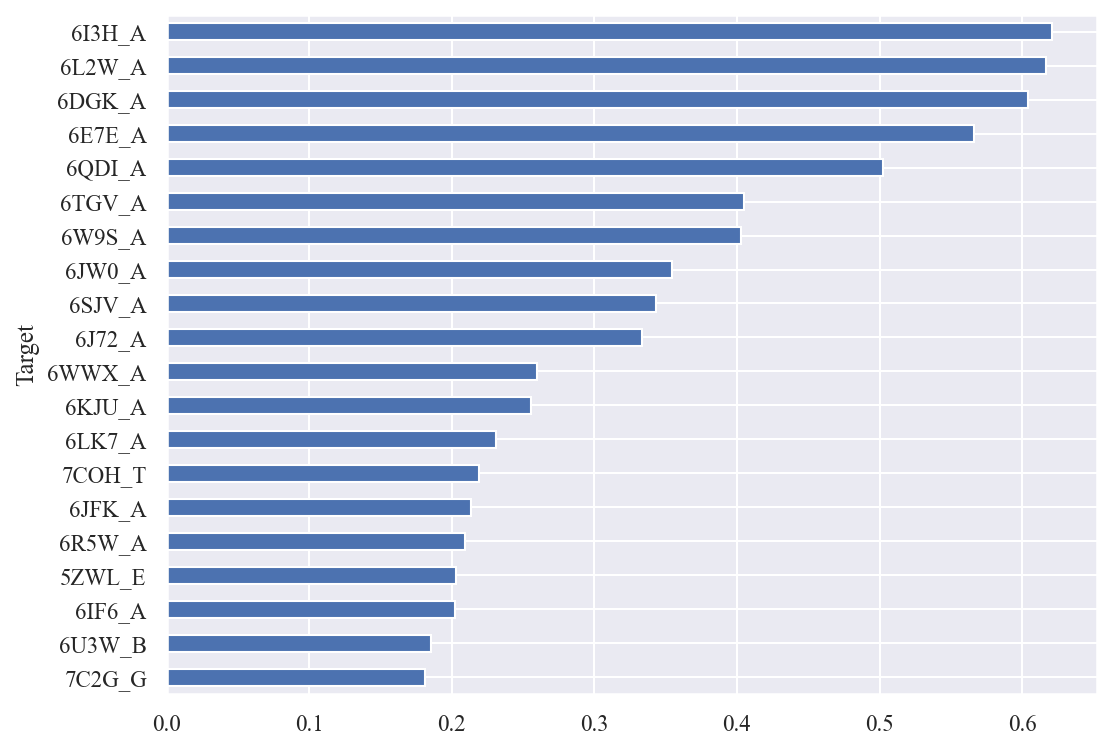

In [7]:
diff_label[-20:].plot(kind='barh', figsize=(8, 6))

In [8]:
import matplotlib.cm as cm
def boxplot_labels(df, labels, y='Target', figsize=(10, 8)):
    fig, axes = plt.subplots(nrows=1, ncols=len(labels), sharex=False, sharey=True, figsize=figsize)
    for i, label in enumerate(labels):
        sns.boxplot(data=df, y=y, x=label, ax=axes[i], color=cm.Set2(i / len(labels)))
    for i in range(1, len(axes)):
        axes[i].set_ylabel('')
    plt.tight_layout()

In [9]:
diff_label

Target
6KV9_A   0.050
6E7R_B   0.051
6QPS_A   0.051
6X1Z_A   0.052
6DHX_A   0.053
          ... 
6QDI_A   0.503
6E7E_A   0.567
6DGK_A   0.604
6L2W_A   0.616
6I3H_A   0.621
Length: 99, dtype: float64

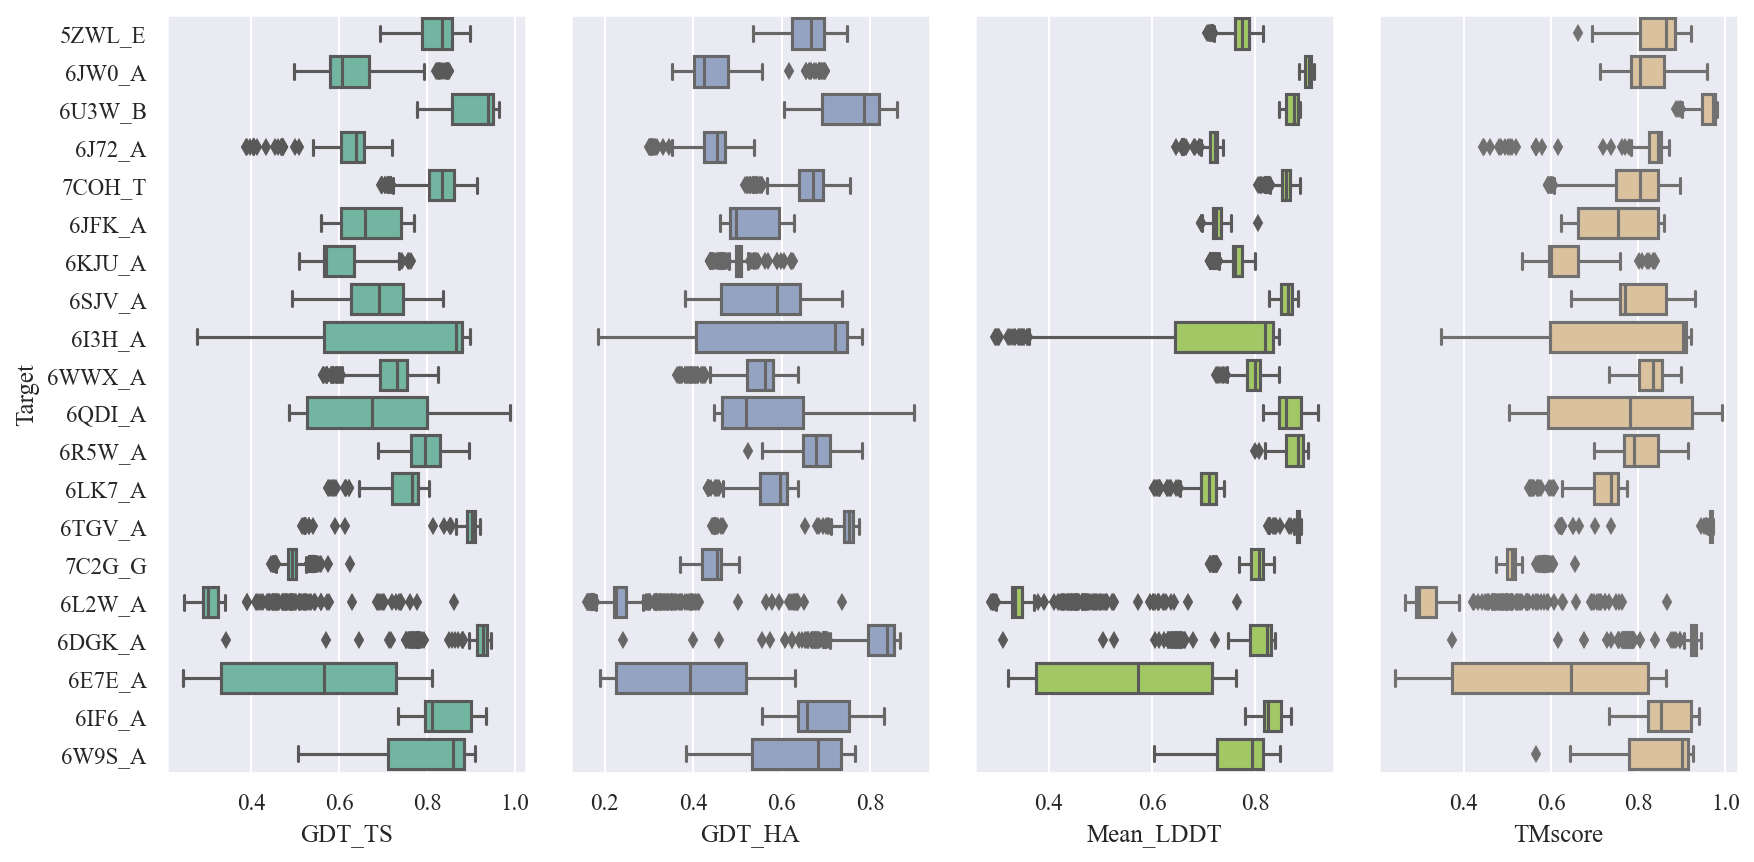

In [10]:
labels = ['GDT_TS', 'GDT_HA', 'Mean_LDDT', 'TMscore']
target_num = 20
targets = diff_label[-target_num:].index
boxplot_labels(fil_df.query('Target in @targets'), labels, figsize=(12, 6))

In [11]:
def scatter(df, x, y, col_wrap=4, lim=(0.7, 1)):
    g = sns.relplot(data=df, kind='scatter', x=x, y=y, col='Target', col_wrap=col_wrap)
    g.set(xlim=lim, ylim=lim)
    plt.subplots_adjust(wspace=0.1)
label = 'GDT_TS'
score = 'pLDDT'
scatter(fil_df, x=score, y=label, lim=(0.3, 1.0), col_wrap=5)